## Data Preparation

In [ ]:
# Step 1: Load and preview the data from CSV
import pandas as pd

# Replace with the actual filename if it's different
df = pd.read_csv('/content/AI & Big Data Global Surveillance Index.csv', sep=';', on_bad_lines='skip')

# Show number of rows and columns
print("Dataset shape:", df.shape)

# Show column names
print("\nColumn names:")
print(df.columns.tolist())

# Display first 5 rows
df.head()

Dataset shape: (77, 38)

Column names:
['Country', 'Region', 'v2x_polyarchy', 'v2x_regime', '"Freedom on the Net 2019" Status', '"Freedom on the Net 2019" Total Score', 'Military Expenditures (USD) 2018', 'Military Expenditures Ranking (2018)', ' BRI Member?', 'China ODI Rank (EIU)', 'Safe City System', 'Facial Recognition System', 'Smart Policing', 'Social Media Surveillance', 'China Tech?', 'US Tech?', 'Other Countries', 'Company 1', 'Company 2', 'Company 3', 'Company 4', 'Company 5', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37']


,Country,Region,v2x_polyarchy,v2x_regime,"""Freedom on the Net 2019"" Status","""Freedom on the Net 2019"" Total Score",Military Expenditures (USD) 2018,Military Expenditures Ranking (2018),BRI Member?,China ODI Rank (EIU),...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,Algeria,MENA,"0,305",EA,NaN,NaN,"9583,7",25.0,1.0,56.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Argentina,WHA,"0,819",ED,FREE,72.0,"4145,0",43.0,NaN,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Australia,EAP,"0,864",LD,FREE,77.0,"26711,8",13.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bahrain,MENA,"0,125",CA,NOT FREE,29.0,"1396,8",65.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Bangladesh,SCA,"0,341",EA,PARTLY FREE,44.0,"3894,7",44.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Step 2: Cleanup column labels
# Rename unnamed company columns
company_counter = 6

# Get the column names from the DataFrame
cols = df.columns.tolist()
for i, col in enumerate(cols):
    if 'Unnamed' in col:
        cols[i] = f'Company {company_counter}'
        company_counter += 1

# Apply updated column names to the DataFrame
df.columns = cols

# Check final column names
df.columns.tolist()

['Country',
 'Region',
 'v2x_polyarchy',
 'v2x_regime',
 '"Freedom on the Net 2019" Status',
 '"Freedom on the Net 2019" Total Score',
 'Military Expenditures (USD) 2018',
 'Military Expenditures Ranking (2018)',
 ' BRI Member?',
 'China ODI Rank (EIU)',
 'Safe City System',
 'Facial Recognition System',
 'Smart Policing',
 'Social Media Surveillance',
 'China Tech?',
 'US Tech?',
 'Other Countries',
 'Company 1',
 'Company 2',
 'Company 3',
 'Company 4',
 'Company 5',
 'Company 6',
 'Company 7',
 'Company 8',
 'Company 9',
 'Company 10',
 'Company 11',
 'Company 12',
 'Company 13',
 'Company 14',
 'Company 15',
 'Company 16',
 'Company 17',
 'Company 18',
 'Company 19',
 'Company 20',
 'Company 21']

In [ ]:
# Step 3: Drop columns that are completely empty (all values are NaN)
df = df.dropna(axis=1, how='all')

# Check updated shape and column names
print("Updated shape:", df.shape)
print("Remaining columns:", df.columns.tolist())

Updated shape: (77, 31)
Remaining columns: ['Country', 'Region', 'v2x_polyarchy', 'v2x_regime', '"Freedom on the Net 2019" Status', '"Freedom on the Net 2019" Total Score', 'Military Expenditures (USD) 2018', 'Military Expenditures Ranking (2018)', ' BRI Member?', 'China ODI Rank (EIU)', 'Safe City System', 'Facial Recognition System', 'Smart Policing', 'Social Media Surveillance', 'China Tech?', 'US Tech?', 'Other Countries', 'Company 1', 'Company 2', 'Company 3', 'Company 4', 'Company 5', 'Company 6', 'Company 7', 'Company 8', 'Company 9', 'Company 10', 'Company 11', 'Company 12', 'Company 13', 'Company 14']


In [ ]:
# Step 4: Fix numbers with commas
# Convert columns to string type before applying str.replace
df['v2x_polyarchy'] = df['v2x_polyarchy'].astype(str).str.replace(',', '.').astype(float)
df['Military Expenditures (USD) 2018'] = df['Military Expenditures (USD) 2018'].astype(str).str.replace(',', '.').astype(float)

# Check data types
df.dtypes

<ipython-input-90-95aeabe74a8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['v2x_polyarchy'] = df['v2x_polyarchy'].astype(str).str.replace(',', '.').astype(float)
<ipython-input-90-95aeabe74a8f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Military Expenditures (USD) 2018'] = df['Military Expenditures (USD) 2018'].astype(str).str.replace(',', '.').astype(float)


,0
Country,object
Region,object
v2x_polyarchy,float64
v2x_regime,object
"""Freedom on the Net 2019"" Status",object
"""Freedom on the Net 2019"" Total Score",float64
Military Expenditures (USD) 2018,float64
Military Expenditures Ranking (2018),float64
BRI Member?,float64
China ODI Rank (EIU),float64


## Exploratory Data Analysis


<ipython-input-91-f24d1ff61b31>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'x' else 0)


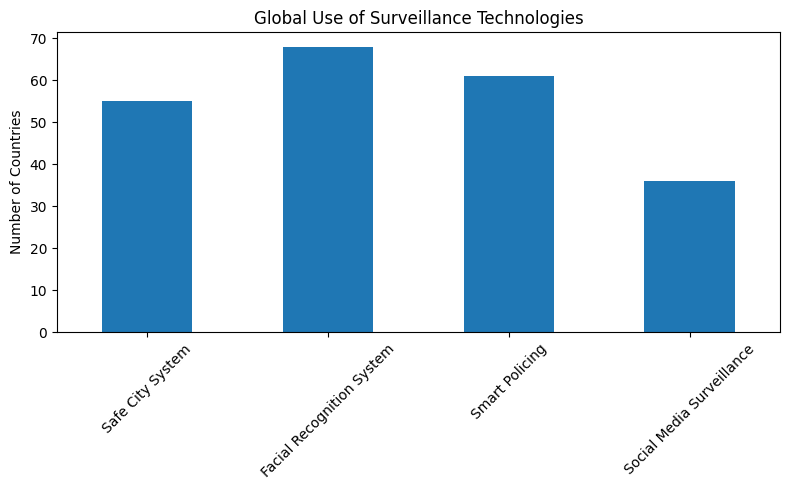

In [91]:
# Question 1: Which surveillance tech is used most?

import matplotlib.pyplot as plt

# Define surveillance columns
surveillance_cols = [
    'Safe City System',
    'Facial Recognition System',
    'Smart Policing',
    'Social Media Surveillance'
]

# Convert Surveillance Flags to Binary (x → 1, else 0)
for col in surveillance_cols:
    df[col] = df[col].apply(lambda x: 1 if str(x).strip().lower() == 'x' else 0)

# Plot the number of countries per surveillance type
df[surveillance_cols].sum().plot(
    kind='bar',
    figsize=(8, 5),
    title='Global Use of Surveillance Technologies'
)

plt.ylabel('Number of Countries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> Observation: The bar chart above shows that the most widely adopted surveillance technology globally is Facial Recognition Systems, followed by Smart Policing, Safe City Systems, and finally Social Media Surveillance.
>
> Interpretation: This suggests that countries tend to prioritize technologies for real-time public space monitoring (e.g., facial recognition and policing) over online monitoring.

In [92]:
# Question 2: Are there countries that don't use any surveillance tech?

# Create a column that sums all 4 techs per country
df['Total Surveillance Score'] = df[surveillance_cols].sum(axis=1)

# Filter for countries with a total score of 0
no_surveillance = df[df['Total Surveillance Score'] == 0]

# Display them
no_surveillance[['Country', 'Region', 'v2x_regime', '"Freedom on the Net 2019" Status']]

,Country,Region,v2x_regime,"""Freedom on the Net 2019"" Status"


> Observation: All countries in the dataset use at least one type of AI surveillance technology. None have a total surveillance score of 0.

> Interpretation: According to the dataset documentation, the index only includes countries for which open-source evidence confirms that governments have acquired AI or big data public surveillance capabilities. Therefore, the absence of any country with a score of zero is not surprising — countries with no surveillance use were not included in the index. This reinforces that the dataset reflects a filtered selection, not the full global picture.

In [93]:
# Question 3: Which countries use the most vs least surveillance tech?

# Sort countries by total surveillance score
sorted_df = df.sort_values('Total Surveillance Score', ascending=False)

# Top 10 most surveilled
top_10 = sorted_df[['Country', 'Region', 'Total Surveillance Score']].head(10)
print("Top 10 Most Surveilled Countries:")
display(top_10)

# Bottom 10 least surveilled (but still > 0)
bottom_10 = sorted_df[sorted_df['Total Surveillance Score'] > 0][['Country', 'Region', 'Total Surveillance Score']].tail(10)
print("Bottom 10 Least Surveilled Countries:")
display(bottom_10)

Top 10 Most Surveilled Countries:


,Country,Region,Total Surveillance Score
2,Australia,EAP,4
4,Bangladesh,SCA,4
7,Brazil,WHA,4
12,China,EAP,4
38,Malaysia,EAP,4
29,Italy,EUR,4
33,Kazakhstan,SCA,4
26,Iran,MENA,4
25,Indonesia,EAP,4
24,India,SCA,4


Bottom 10 Least Surveilled Countries:


,Country,Region,Total Surveillance Score
50,Peru,WHA,2
46,New Zealand,EAP,2
72,Uzbekistan,SCA,2
0,Algeria,MENA,1
9,Cambodia,EAP,1
30,Ivory Coast,AF,1
49,Paraguay,WHA,1
62,Taiwan,EAP,1
74,Vietnam,EAP,1
73,Venezuela,WHA,1


> Observation: The 10 most-surveilled countries (using all 4 technologies) include a diverse mix: from democratic nations like Australia and Italy to authoritarian regimes like China and Iran. Similarly, the least-surveilled group also spans various regions and governance models.  
>
> Interpretation: There is no immediately clear geopolitical, economic, or ideological pattern in terms of how many surveillance technologies are adopted. This suggests that the total number of techs used alone may not be enough to explain adoption patterns — I will need to explore regional, freedom-based, or military spending trends next.


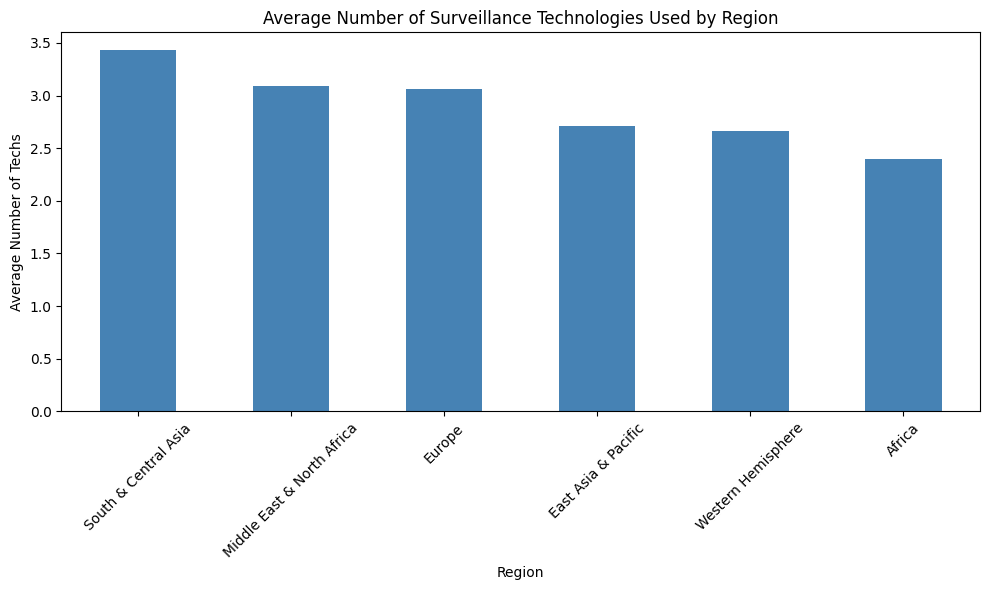

In [94]:
# Question 4: Are there regional surveillance patterns?

# Replace region codes with full names
region_names = {
    'SCA': 'South & Central Asia',
    'MENA': 'Middle East & North Africa',
    'EUR': 'Europe',
    'EAP': 'East Asia & Pacific',
    'WHA': 'Western Hemisphere',
    'AF': 'Africa'
}

# Apply the mapping to the Region column
df['Region'] = df['Region'].replace(region_names)


# Group by region and calculate average number of surveillance technologies used
regional_surveillance = df.groupby('Region')['Total Surveillance Score'].mean().sort_values(ascending=False)

# Plot the results
regional_surveillance.plot(
    kind='bar',
    figsize=(10, 6),
    title='Average Number of Surveillance Technologies Used by Region',
    color='#4682b4'
)

plt.ylabel('Average Number of Techs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Observation:  
The bar chart shows that the region with the highest average use of AI surveillance technologies is South & Central Asia, followed by MENA and Europe. Regions typically associated with greater wealth, such as Europe and parts of the Western Hemisphere, do not lead the ranking.

Interpretation:  
These results suggest that the adoption of surveillance technology is not directly tied to economic development. For example, Africa, largely composed of lower-income countries, has the lowest average, while South & Central Asia, with a mix of middle- and low-income nations, ranks highest.

The regional groupings used in the dataset (e.g., combining the USA and Bolivia under "Western Hemisphere") are broad and may obscure internal variation. Splitting regions further could offer deeper insights but it would require additional data manipulation.

Rather than further segmenting regions, the next step will investigate whether a country's use of surveillance technology supplied by companies from the United States or China is associated with the overall intensity of surveillance deployment. This allows for a more technology-oriented perspective on global surveillance patterns, focusing on vendor origin rather than geography or governance.

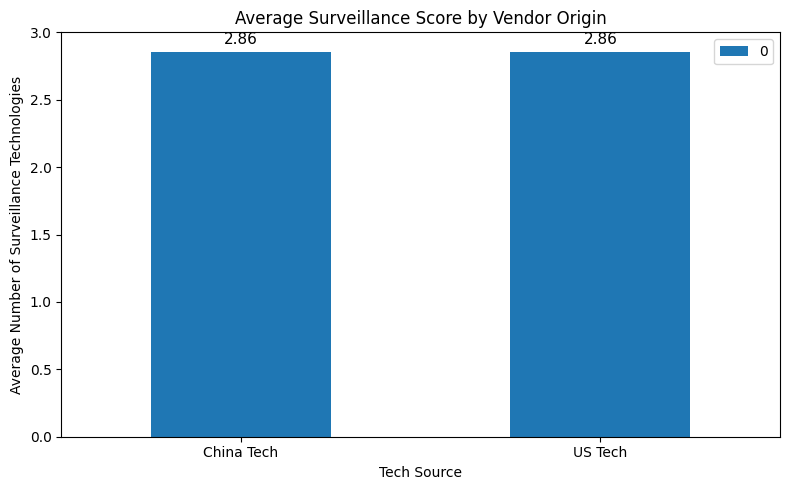

In [95]:
# Question 5: Does sourcing tech from the US or China relate to surveillance intensity?

# Preview raw values
df[['China Tech?', 'US Tech?']].head(10)

# Convert to binary (x → 1, else 0)
df['China Tech?'] = df['China Tech?'].apply(lambda x: 1 if str(x).strip().lower() == 'x' else 0)
df['US Tech?'] = df['US Tech?'].apply(lambda x: 1 if str(x).strip().lower() == 'x' else 0)

# Compare average surveillance score by tech source
china_avg = df.groupby('China Tech?')['Total Surveillance Score'].mean()
us_avg = df.groupby('US Tech?')['Total Surveillance Score'].mean()

# Combine into a single DataFrame for plotting
comparison_df = pd.DataFrame({
    'China Tech': china_avg,
    'US Tech': us_avg
}).T

# Plot with value labels
ax = comparison_df.plot(
    kind='bar',
    figsize=(8, 5),
    title='Average Surveillance Score by Vendor Origin',
    color=['#1f77b4', '#ff7f0e']  # optional: different colors
)

plt.ylabel('Average Number of Surveillance Technologies')
plt.xlabel('Tech Source')
plt.xticks(rotation=0)
plt.tight_layout()

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=11)

plt.show()

Observation:  
The bar chart shows that the average surveillance score is identical (2.86) for countries using US-based and Chinese surveillance technologies.

Interpretation:  
This suggests that sourcing technology from companies based in the United States or China does not, by itself, correlate with the number of surveillance technologies deployed by a country. However, these two groups are not mutually exclusive — several countries source technology from both vendors, meaning they were counted in both averages. This overlapping inclusion limits the usefulness of this comparison. A clearer understanding may come from explicitly categorizing countries as sourcing from only China, only the US, both, or neither.

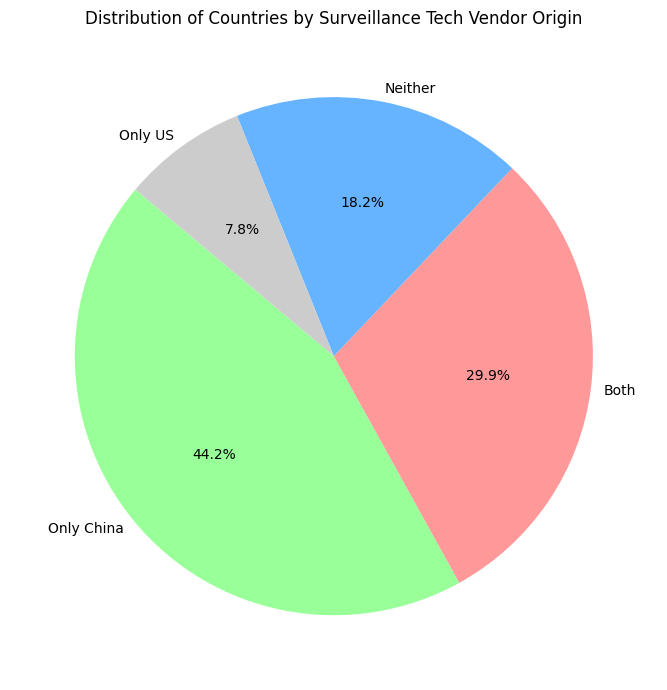

In [96]:
# Question 6: How are countries distributed based on their surveillance tech vendor origin?

import pandas as pd
import matplotlib.pyplot as plt

# Reload original CSV just for tech columns
original_df = pd.read_csv('/content/AI & Big Data Global Surveillance Index.csv', sep=';', on_bad_lines='skip')

# Replace tech source columns in df
df['China Tech?'] = original_df['China Tech?']
df['US Tech?'] = original_df['US Tech?']

# Convert float 1.0 → 1, NaN → 0
df['China Tech?'] = df['China Tech?'].apply(lambda x: 1 if x == 1.0 else 0)
df['US Tech?'] = df['US Tech?'].apply(lambda x: 1 if x == 1.0 else 0)

# Categorize countries
def tech_source(row):
    if row['China Tech?'] == 1 and row['US Tech?'] == 1:
        return 'Both'
    elif row['China Tech?'] == 1:
        return 'Only China'
    elif row['US Tech?'] == 1:
        return 'Only US'
    else:
        return 'Neither'

df['Tech Source Category'] = df.apply(tech_source, axis=1)

# Count categories
tech_counts = df['Tech Source Category'].value_counts()

# Plot pie chart
colors = ['#99ff99', '#ff9999', '#66b3ff', '#cccccc']  # Both, China, US, Neither
tech_counts.plot.pie(
    autopct='%1.1f%%',
    figsize=(7, 7),
    title='Distribution of Countries by Surveillance Tech Vendor Origin',
    colors=colors,
    startangle=140,
    labeldistance=1.05
)

plt.ylabel('')
plt.tight_layout()
plt.show()

Observation:  
The pie chart shows that 44.2% of countries in the dataset source surveillance technology only from China, 29.9% from both China and the US, 18.2% from neither, and only 7.8% exclusively from the US.

Interpretation:  
Contrary to common assumptions, the United States has a relatively small share of exclusive customers in this space. The majority of countries either rely solely on Chinese vendors or use both US and Chinese technologies. This raises interesting questions about geopolitical influence, accessibility, or strategic partnerships behind vendor selection. The next step in this analysis will explore which countries fall into each sourcing group, followed by an examination of their political regime types.

Note: Particular care is being taken in this analysis to focus on labels and columns with complete or high-quality data. When dealing with ethical considerations in AI — as discussed in the 'Ethics and Regulations of Artificial Intelligence' course — basing conclusions on incomplete or biased data sources can be misleading. For this reason, the exploratory analysis prioritizes reliable fields, and any insights drawn from sparse data will be clearly flagged as limited.

In [97]:
# Question 7: Which countries use only China, only US, both, or neither?

# Group countries by vendor origin category
grouped_countries = df.groupby('Tech Source Category')['Country'].apply(list).to_dict()

# Display country lists per group
for category, countries in grouped_countries.items():
    print(f"\n{category} ({len(countries)} countries):")
    print(', '.join(countries))


Both (23 countries):
Argentina, Australia, Bangladesh, Brazil, China, Denmark, Egypt, France, Germany, India, Indonesia, Mexico, New Zealand, Panama, Philippines, Russia, Saudi Arabia, Singapore, Spain, Ukraine, United Arab Emirates, United Kingdom, Uruguay

Neither (14 countries):
Cambodia, Colombia, Czech Republic, Georgia, Hungary, Jamaica, Japan, Namibia, Paraguay, Qatar, Romania, Switzerland, Taiwan, Vietnam

Only China (34 countries):
Algeria, Bolivia, Botswana, Burma/Myanmar, Chile, Ecuador, Ghana, Hong Kong, Iran, Iraq, Italy, Ivory Coast, Kazakhstan, Kenya, Kyrgyzstan, Laos, Malaysia, Malta, Mauritius, Mongolia, Morocco, Netherlands, Pakistan, Peru, Serbia, South Africa, Tajikistan, Thailand, Turkey, Uganda, Uzbekistan, Venezuela, Zambia, Zimbabwe

Only US (6 countries):
Bahrain, Canada, Israel, Lebanon, South Korea, United States of America


Observation:  
The majority of countries sourcing surveillance technology do so either exclusively from China (34 countries) or from both China and the US (23 countries). Only six countries use US technology alone, while 14 countries are not reported to use tech from either source.

Interpretation:  
Given the United States’ historical leadership in AI development and global surveillance infrastructure (e.g. home to major vendors like Palantir, IBM, and Cisco, and a founding member of defense alliances like NATO and Five Eyes), one might expect US vendors to dominate this space. However, the data reveals a different reality: Chinese vendors are more widely adopted — including by countries typically aligned with the West (e.g., Italy, the Netherlands, Turkey).

This unexpected trend may point to Chinese surveillance technology being more accessible, whether due to cost, bundled services, or broader availability. To explore this further, the next step will examine whether countries with lower military spending — a potential proxy for economic and technological capacity — are more likely to rely on Chinese vendors.

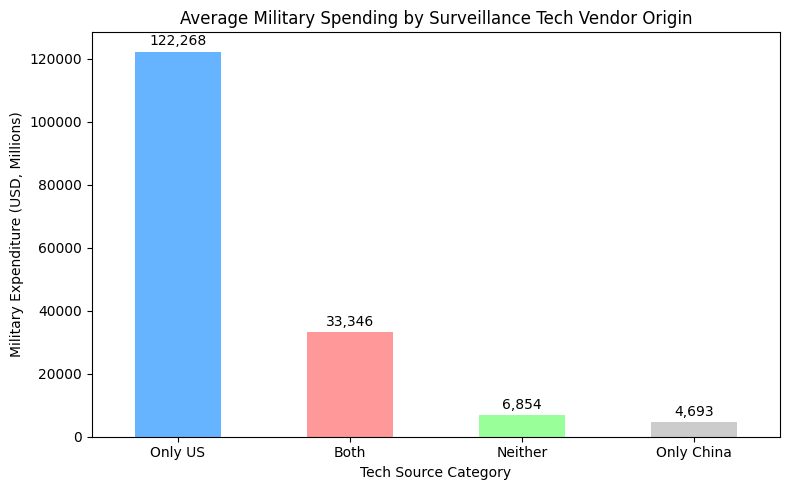

In [98]:
# Question 8: Are countries with lower military spending more likely to use Chinese surveillance technology?

import matplotlib.pyplot as plt

# Drop rows with missing military expenditure
mil_df = df.dropna(subset=['Military Expenditures (USD) 2018'])

# Group by tech source category and calculate average military spending
mil_avg = mil_df.groupby('Tech Source Category')['Military Expenditures (USD) 2018'].mean().sort_values(ascending=False)

# Plot bar chart
ax = mil_avg.plot(
    kind='bar',
    color=['#66b3ff', '#ff9999', '#99ff99', '#cccccc'],  # US, China, Both, Neither
    figsize=(8, 5),
    title='Average Military Spending by Surveillance Tech Vendor Origin'
)

plt.ylabel('Military Expenditure (USD, Millions)')
plt.xlabel('Tech Source Category')
plt.xticks(rotation=0)
plt.tight_layout()

# Add value labels on top of bars
for i, value in enumerate(mil_avg):
    plt.text(i, value + 1000, f'{value:,.0f}', ha='center', va='bottom', fontsize=10)

plt.show()

Observation:  
The average military expenditure varies significantly by vendor origin group: countries that source surveillance technology only from the US spend an average of 122,268 million USD, while those using only Chinese technology spend just 4,693 million USD. Countries sourcing from both spend around 33,346 million USD, and those sourcing from neither spend approximately 6,854 million USD.

Interpretation:  
These results support the hypothesis that Chinese surveillance technology is more accessible to countries with lower defense spending. The US appears to be a supplier primarily to nations with significantly higher military budgets, possibly due to higher costs, stricter export controls, or more complex political requirements. On the other hand, Chinese vendors may offer more cost-effective, turnkey solutions that are attractive or necessary for countries with limited military capacity.

This suggests that vendor selection is not solely a matter of political alignment or ideology, but may be shaped heavily by a country's economic and technological capacity. To better understand this pattern, the next step will examine whether countries with lower military spending that rely on Chinese tech are associated with particular political regime types.

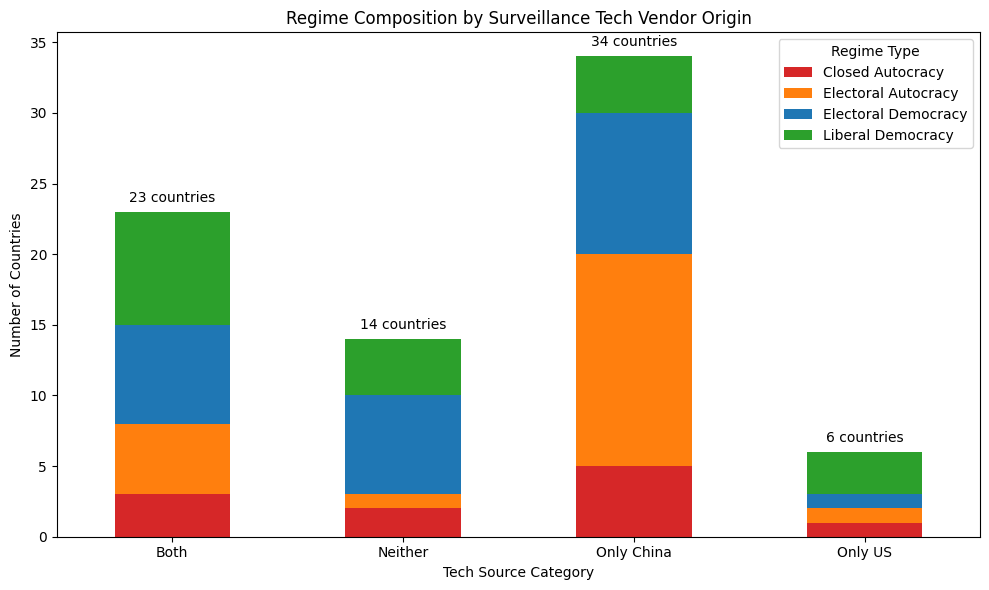

In [99]:
# Question 9: Regime composition by surveillance tech vendor origin

import matplotlib.pyplot as plt

# Step 1: Map regime labels
regime_map = {
    'CA': 'Closed Autocracy',
    'EA': 'Electoral Autocracy',
    'ED': 'Electoral Democracy',
    'LD': 'Liberal Democracy'
}
df['Regime Type'] = df['v2x_regime'].map(regime_map)

# Step 2: Build stacked data
regime_dist = df.groupby(['Tech Source Category', 'Regime Type']).size().unstack().fillna(0)

# Step 3: Define custom colors (green → most free, red → least free)
colors = {
    'Liberal Democracy': '#2ca02c',
    'Electoral Democracy': '#1f77b4',
    'Electoral Autocracy': '#ff7f0e',
    'Closed Autocracy': '#d62728'
}

# Step 4: Plot with custom colors
ax = regime_dist.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    title='Regime Composition by Surveillance Tech Vendor Origin',
    color=[colors[col] for col in regime_dist.columns]
)

plt.ylabel('Number of Countries')
plt.xlabel('Tech Source Category')
plt.xticks(rotation=0)
plt.tight_layout()

# Step 5: Add percentage labels next to each bar
for idx, total in enumerate(regime_dist.sum(axis=1)):
    pct_label = f'{int(total)} countries'
    ax.text(idx, total + 0.5, pct_label, ha='center', va='bottom', fontsize=10)

plt.show()

Observation:  
The stacked bar chart shows the distribution of political regime types within each tech vendor sourcing group. Countries that source only from China are primarily Electoral Autocracies (15) and Electoral Democracies (10), while those sourcing only from the US are mostly Liberal Democracies (3) and include just one country from each of the other regime types. The “Both” group is more evenly distributed, with a higher number of Liberal and Electoral Democracies.

Interpretation:  
This suggests that Chinese surveillance technology is adopted across a wide range of regime types, particularly among countries with weaker democratic institutions. In contrast, US-exclusive vendor relationships are concentrated in Liberal Democracies, reinforcing the idea that the US tends to partner with freer, more institutionally stable regimes. The “Both” group includes countries with mixed regime types, possibly reflecting a more pragmatic or balanced strategic approach. These patterns reinforce earlier findings that vendor choice is influenced by more than just regime label — factors like capacity and digital policy also play a role.

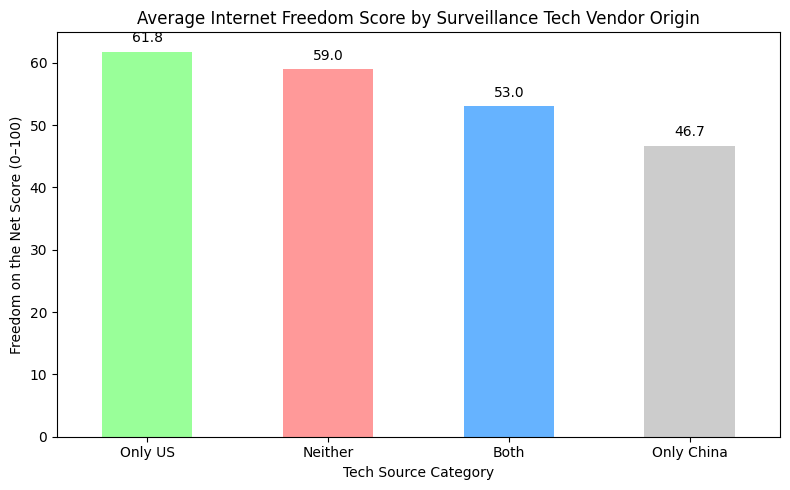

In [100]:
# Question 10: Is Chinese surveillance tech more common in countries with lower internet freedom?

import matplotlib.pyplot as plt

# Step 1: Filter rows with non-null freedom score
freedom_df = df[(df['Tech Source Category'].notna()) & (df['"Freedom on the Net 2019" Total Score'].notna())]

# Step 2: Group by tech source category and compute average freedom score
freedom_avg = freedom_df.groupby('Tech Source Category')['"Freedom on the Net 2019" Total Score'].mean().sort_values(ascending=False)

# Step 3: Plot
ax = freedom_avg.plot(
    kind='bar',
    color=['#99ff99', '#ff9999', '#66b3ff', '#cccccc'],  # FREE -> Both, China, US, Neither
    figsize=(8, 5),
    title='Average Internet Freedom Score by Surveillance Tech Vendor Origin'
)

plt.ylabel('Freedom on the Net Score (0–100)')
plt.xlabel('Tech Source Category')
plt.xticks(rotation=0)
plt.tight_layout()

# Add value labels
for i, value in enumerate(freedom_avg):
    plt.text(i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=10)

plt.show()

Observation:  
The bar chart shows that countries sourcing only from the US or from neither vendor group have the highest average internet freedom scores (61.8 and 59.0 respectively). Countries that rely exclusively on Chinese vendors score the lowest (46.7), while those sourcing from both vendors fall in the middle (53.0).

Interpretation:  
This pattern supports earlier findings that countries with lower internet freedom are more likely to adopt Chinese surveillance technologies. While the difference is not dramatic, it suggests that vendor choice may be shaped by a country's broader stance on digital rights and civil liberties. However, this alone is not conclusive and may be influenced by other overlapping factors such as economic capacity or political alignment.

## EDA Wrap-Up

The exploratory analysis revealed several key trends in the adoption of AI and big data surveillance technologies:

1. **Technology Type**: Facial recognition and smart policing are the most widely adopted surveillance technologies globally.
2. **Regional Adoption**: South & Central Asia and MENA countries report the highest average adoption of surveillance tech, while African nations lag behind.
3. **Economic Indicators**: Countries with lower military expenditures are more likely to source Chinese surveillance technology, supporting the hypothesis that Chinese vendors offer more accessible solutions for low-capacity countries.
4. **Political Regime**: Countries across all regime types — from closed autocracies to liberal democracies — use Chinese and US surveillance tech. However, the stacked regime composition shows that US-exclusive vendors are more common among liberal democracies, while Chinese tech is more evenly distributed.
5. **Internet Freedom**: Countries with higher internet freedom scores tend to avoid Chinese surveillance tech, while those using only Chinese vendors score lowest on digital freedom metrics.

Taken together, these patterns suggest that vendor selection is shaped not by a single factor, but by a combination of economic capacity, governance style, and digital policy. The next step will involve predictive modeling to test which of these variables most strongly predicts the adoption of surveillance technologies.

## Predictive Modeling



## Feature Engineering

For the predictive model, the selected target is **Social Media Surveillance**, a binary variable indicating whether a country has adopted this technology. This specific technology was chosen for its relative rarity (compared to other surveillance tools) and its close relationship with internet freedom, digital infrastructure, and political governance.

Rather than including all available variables from the start, this model begins with a focused set of features most directly related to digital capacity and civil liberties. This approach allows for cleaner interpretation and avoids overfitting. Additional geopolitical or economic features may be layered in future iterations to evaluate their incremental value.

The selected features are:

- `v2x_polyarchy`: a democracy score ranging from 0 to 1  
- `"Freedom on the Net 2019" Total Score`: a continuous metric (0–100) reflecting internet openness  
- `Total Surveillance Score`: the number of surveillance technologies a country uses, serving as a proxy for technological intensity  
- `v2x_regime`: a categorical label representing the country’s regime type (e.g., Liberal Democracy, Electoral Autocracy)

The categorical variable `v2x_regime` is one-hot encoded to allow the model to interpret it numerically.

In [101]:
# Step 1: Create the target variable
y = df['Social Media Surveillance']

# Step 2: Select features
X = df[[
    'v2x_polyarchy',
    '"Freedom on the Net 2019" Total Score',
    'Total Surveillance Score',
    'v2x_regime'
]].copy()

# Step 3: One-hot encode the regime type
X = pd.get_dummies(X, columns=['v2x_regime'], drop_first=True)

# Step 4: Preview final dataset shape
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)
X.head()

Feature matrix shape: (77, 6)
Target vector shape: (77,)


,v2x_polyarchy,"""Freedom on the Net 2019"" Total Score",Total Surveillance Score,v2x_regime_EA,v2x_regime_ED,v2x_regime_LD
0,0.305,NaN,1,True,False,False
1,0.819,72.0,3,False,True,False
2,0.864,77.0,4,False,False,True
3,0.125,29.0,3,False,False,False
4,0.341,44.0,4,True,False,False


In [102]:
# Drop rows with missing values (just for model input)
X = X.dropna()
y = y[X.index]  # Make sure target matches filtered features

# Confirm new shape
print("Shape after dropping missing data:", X.shape)

Shape after dropping missing data: (47, 6)


In [103]:
## Model Selection and Logistic Regression Training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 2: Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 3: Predict on test set
y_pred = model.predict(X_test)

# Step 4: Evaluate model
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.88      1.00      0.93         7

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



### Logistic Regression Summary

To establish a baseline, a logistic regression model was trained to predict whether a country has adopted social media surveillance technology, using democracy score, internet freedom score, surveillance intensity, and regime type as features.

The model achieved an accuracy of 90% on the test set. It performed particularly well in identifying countries that use social media surveillance, achieving 100% recall for that class. The relatively high scores may be influenced by the small sample size (47 countries after cleaning) and the strength of the selected features.

While this first model confirms that the selected features carry predictive power, logistic regression is a linear model with limited ability to capture non-linear relationships or complex interactions between features. For this reason, a more advanced model such as a Random Forest will be explored next, along with SHAP analysis for interpreting feature influence.

In [104]:
## Random Forest Model

# Step 1: Import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Step 2: Re-split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Evaluate performance
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.88      1.00      0.93         7

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



### Random Forest Summary

To complement the baseline logistic regression model, a Random Forest classifier was trained using the same set of input features. As an ensemble of decision trees, Random Forest is capable of capturing non-linear relationships and complex feature interactions, offering a more flexible modeling approach.

The model achieved an overall accuracy of 90% on the test set, identical to the logistic regression model. It also demonstrated strong performance in identifying countries that use social media surveillance, with a recall of 100% for that class. These results confirm that the selected features carry significant predictive value.

However, the small sample size and the simplicity of the feature set may be limiting the potential gains from using a more complex model.

## Feature Expansion

To test whether additional geopolitical and economic features can improve the model’s predictive performance, the feature set was expanded to include military expenditure, region, and surveillance vendor origin. These variables are either numerical or categorical and were one-hot encoded to ensure compatibility with the model.

In [105]:
# Step 1: Create the target variable
y = df['Social Media Surveillance']

# Step 2: Select features (expanded version)
X = df[[
    'v2x_polyarchy',
    '"Freedom on the Net 2019" Total Score',
    'Total Surveillance Score',
    'v2x_regime',
    'Military Expenditures (USD) 2018',
    'Region',
    'Tech Source Category'
]].copy()

# Step 3: One-hot encode categorical features
X = pd.get_dummies(X, columns=['v2x_regime', 'Region', 'Tech Source Category'], drop_first=True)

# Step 4: Drop rows with missing values (due to new features)
X = X.dropna()
y = y[X.index]

# Step 5: Re-split the updated dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Train Random Forest on expanded features
rf_model_expanded = RandomForestClassifier(random_state=42)
rf_model_expanded.fit(X_train, y_train)

# Predict and evaluate
y_pred_expanded = rf_model_expanded.predict(X_test)
print("Random Forest (Expanded Features) Classification Report:\n")
print(classification_report(y_test, y_pred_expanded))

Random Forest (Expanded Features) Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      0.88      0.88         8

    accuracy                           0.78         9
   macro avg       0.44      0.44      0.44         9
weighted avg       0.78      0.78      0.78         9



## Hyperparameter Tuning

The initial Random Forest model experienced a drop in performance after adding additional features, particularly in its ability to correctly predict countries not using social media surveillance. This suggests possible overfitting or suboptimal parameter settings.

To address this, a grid search with cross-validation will be performed to find the best combination of hyperparameters.

In [106]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize the base model
rf_base = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Run the grid search on training data
grid_search.fit(X_train, y_train)

# Print best parameters
print("Best Parameters Found:")
print(grid_search.best_params_)

# Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import classification_report
print("Tuned Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_best))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best Parameters Found:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.88      0.88      0.88         8

    accuracy                           0.78         9
   macro avg       0.44      0.44      0.44         9
weighted avg       0.78      0.78      0.78         9



### Hyperparameter Tuning Summary

The Random Forest model was tuned using GridSearchCV across 72 combinations of hyperparameters, with accuracy as the scoring metric.

The best combination found was:
- `n_estimators`: 200  
- `max_depth`: None  
- `min_samples_split`: 2  
- `min_samples_leaf`: 1  
- `max_features`: 'sqrt'

However, the tuned model still struggled to predict countries not using social media surveillance, with precision and recall for class 0 remaining at 0%. This suggests that the additional features may not be improving the model’s predictive power and could be introducing noise.

A potential next step would be to return to a simpler feature set or test feature importance to guide feature selection.

## Feature Importance Analysis

### Method Selection

To identify the most influential predictors of social media surveillance adoption, the built-in `.feature_importances_` attribute of the Random Forest model was selected. This method is fast, interpretable, and well-suited to tree-based models.

While alternative approaches like SHAP values or permutation importance offer deeper insight into individual predictions or global variance contributions, `.feature_importances_` provides a robust, no-friction overview of feature relevance — especially useful when model performance is already stable and sample size is limited.

### Analysis

The resulting importance scores were plotted to reveal the features that contributed most to the model’s decisions. This allows us to validate our feature selection and understand the variables driving predictions.

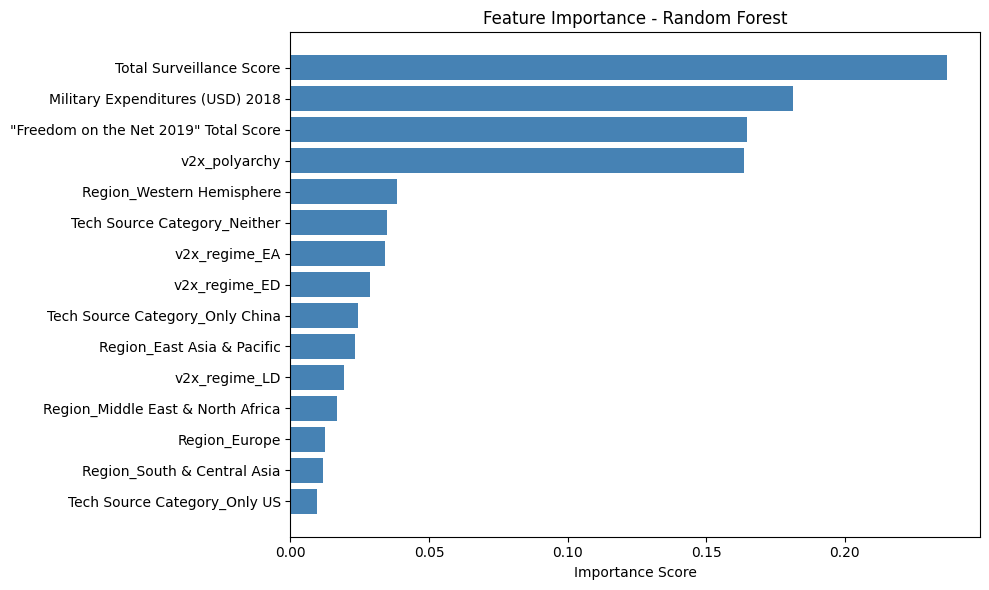

In [107]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances from the best-tuned model
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for easy plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='steelblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()

### Feature Importance Interpretation

The Random Forest model identified a clear ranking of influential features in predicting the presence of social media surveillance.

- The **Total Surveillance Score** emerged as the strongest predictor, which aligns with intuition: countries that adopt multiple surveillance technologies are more likely to implement social media monitoring.
- **Military Expenditure** also showed high importance, suggesting that countries with larger defense budgets may have more capacity to invest in digital surveillance infrastructure.
- **Democracy score (v2x_polyarchy)** was moderately important, reinforcing earlier findings that political structure influences surveillance decisions.

On the other hand, features like **vendor origin** and **region** (especially “Only US” or “South & Central Asia”) showed very limited impact, suggesting they may add noise rather than meaningful signal. This supports earlier observations that geopolitical alignment may not be the strongest standalone predictor.

These insights validate the strength of governance and internal surveillance intensity as core drivers — while also offering guidance on which variables to prioritize in future modeling iterations.